In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sms


In [16]:
adv = pd.read_csv(r"C:\Users\admin\Downloads\Advertising.csv",index_col=0)

In [17]:
adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [18]:
adv.size


800

In [19]:
adv.describe(include='all')

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [20]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


<AxesSubplot:xlabel='radio', ylabel='sales'>

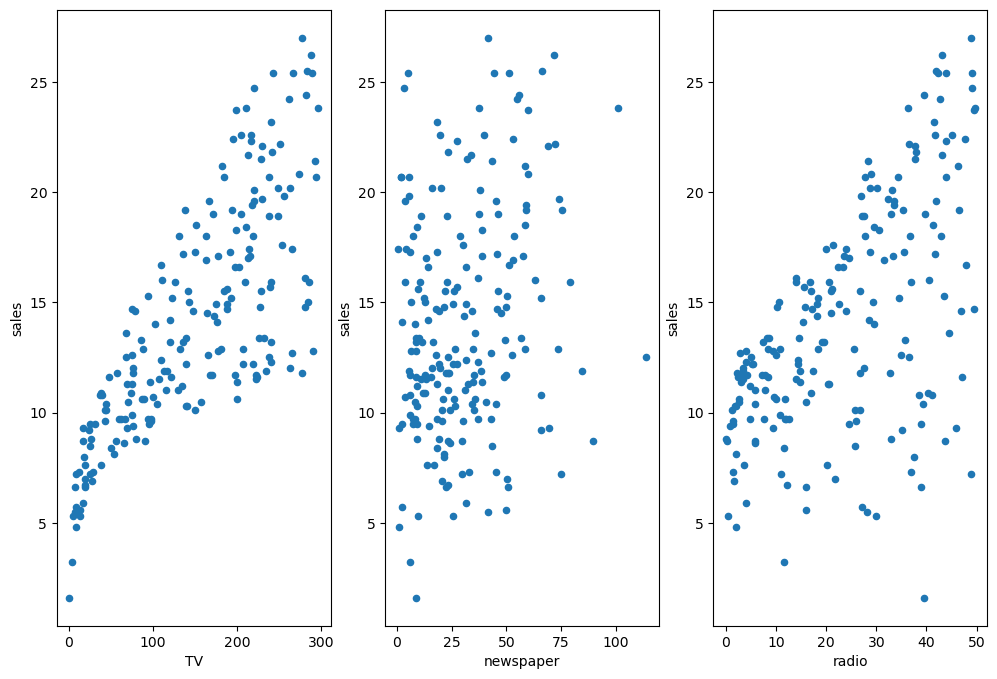

In [28]:
fig,axs=plt.subplots(1,3)
adv.plot(kind='scatter',x='TV',y='sales',ax=axs[0])
adv.plot(kind='scatter',x='newspaper',y='sales',ax=axs[1])
adv.plot(kind='scatter',x='radio',y='sales',ax=axs[2],figsize=(12,8))

# simple linear regression

In [30]:
model = sms.ols(formula = 'sales~TV',data=adv).fit()

In [31]:
model.rsquared

0.611875050850071

In [32]:
model.rsquared_adj

0.6099148238341623

In [33]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           1.47e-42
Time:                        13:21:35   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# multiple linear regression

In [34]:
model1 = sms.ols(formula='sales~TV+newspaper+radio',data=adv).fit()

In [36]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           1.58e-96
Time:                        13:52:10   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Feature engineering (scaling the data)-Eda-2

In [39]:
df = pd.DataFrame({'ID' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
             'Name' : ['John', 'Jack', 'Mariah', 'Krishna', 'Danny', 'Lisa', 'Andrew', 'Ravi', 'Garima', 'Kavita'],
             'Gender' :['Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female'],
              'Profession' : ['Manager', 'Manager', 'Developer', 'Team Lead', 'Team Lead', 'Assistant Manager', 'Assistant Manager', 'Manager', 'Assistant Manager', 'CEO'],
              'Salary' : [100000, 120000, 95000, 99000, 105000, 145000, 155000, 78000, 167000, 195000],
              'Experience' : [10, 13, 6, 8, 10, 13, 19, 15, 20, 24]})

In [40]:
df

,ID,Name,Gender,Profession,Salary,Experience
0,1,John,Male,Manager,100000,10
1,2,Jack,Male,Manager,120000,13
2,3,Mariah,Female,Developer,95000,6
3,4,Krishna,Male,Team Lead,99000,8
4,5,Danny,Male,Team Lead,105000,10
5,6,Lisa,Female,Assistant Manager,145000,13
6,7,Andrew,Male,Assistant Manager,155000,19
7,8,Ravi,Male,Manager,78000,15
8,9,Garima,Female,Assistant Manager,167000,20
9,10,Kavita,Female,CEO,195000,24


In [42]:
 mean = df['Salary'].mean()
mean

125900.0

In [43]:
std = df['Salary'].std()
std

37698.95371374531

In [46]:
std_data = (df['Salary']-mean)/std
std_data

0   -0.687022
1   -0.156503
2   -0.819651
3   -0.713548
4   -0.554392
5    0.506645
6    0.771905
7   -1.270592
8    1.090216
9    1.832942
Name: Salary, dtype: float64

In [47]:
std_data.mean()


2.2204460492503132e-17

In [48]:
std_data.std()

1.0

In [50]:
median = df['Salary'].median()
median

112500.0

In [52]:
q3 = df['Salary'].quantile(.75)
q3

152500.0

In [53]:
q1  =df['Salary'].quantile(0.25)
q1

99250.0

In [54]:
IQR = q3-q1
IQR

53250.0

In [55]:
robust_data = (df['Salary']-median)/IQR
robust_data

0   -0.234742
1    0.140845
2   -0.328638
3   -0.253521
4   -0.140845
5    0.610329
6    0.798122
7   -0.647887
8    1.023474
9    1.549296
Name: Salary, dtype: float64

# Through python package

In [60]:
from sklearn.preprocessing import StandardScaler,RobustScaler,Normalizer,MinMaxScaler

## StandardScaler

In [61]:
std_scale = StandardScaler()

In [62]:
df['standard_salary'] = std_scale.fit_transform(df[['Salary']])

In [63]:
df

,ID,Name,Gender,Profession,Salary,Experience,standard_salary
0,1,John,Male,Manager,100000,10,-0.724184
1,2,Jack,Male,Manager,120000,13,-0.164969
2,3,Mariah,Female,Developer,95000,6,-0.863988
3,4,Krishna,Male,Team Lead,99000,8,-0.752145
4,5,Danny,Male,Team Lead,105000,10,-0.584381
5,6,Lisa,Female,Assistant Manager,145000,13,0.534051
6,7,Andrew,Male,Assistant Manager,155000,19,0.813659
7,8,Ravi,Male,Manager,78000,15,-1.339322
8,9,Garima,Female,Assistant Manager,167000,20,1.149188
9,10,Kavita,Female,CEO,195000,24,1.932091


## MinMax

In [66]:
min_max = MinMaxScaler()

In [68]:
df['Min_max_data'] = min_max.fit_transform(df[['Salary']])

In [69]:
df

,ID,Name,Gender,Profession,Salary,Experience,standard_salary,Min_max_data
0,1,John,Male,Manager,100000,10,-0.724184,0.188034
1,2,Jack,Male,Manager,120000,13,-0.164969,0.358974
2,3,Mariah,Female,Developer,95000,6,-0.863988,0.145299
3,4,Krishna,Male,Team Lead,99000,8,-0.752145,0.179487
4,5,Danny,Male,Team Lead,105000,10,-0.584381,0.230769
5,6,Lisa,Female,Assistant Manager,145000,13,0.534051,0.572650
6,7,Andrew,Male,Assistant Manager,155000,19,0.813659,0.658120
7,8,Ravi,Male,Manager,78000,15,-1.339322,0.000000
8,9,Garima,Female,Assistant Manager,167000,20,1.149188,0.760684
9,10,Kavita,Female,CEO,195000,24,1.932091,1.000000


In [72]:
df['Min_max_data'].min()

0.0

In [73]:
df['Min_max_data'].max()

1.0

## Robust Scalar

In [74]:
robuust_scale = RobustScaler()

In [75]:
df['Robust_data'] = robuust_scale.fit_transform(df[['Salary']])

In [81]:
df['Robust_data']

0   -0.234742
1    0.140845
2   -0.328638
3   -0.253521
4   -0.140845
5    0.610329
6    0.798122
7   -0.647887
8    1.023474
9    1.549296
Name: Robust_data, dtype: float64

## Normalizer

In [77]:
norm = Normalizer()

In [80]:
df['norm_data'] = norm.fit_transform(df[['Salary']])

In [82]:
df['norm_data']

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: norm_data, dtype: float64